# UNIVERSIDAD POLITECNICA SALESIANA



   ### EXAMEN DE INTELIGENCIA ARTIFICIAL



Enunciado:

•	Diseñe y desarrolle un sistema recopilador que permita obtener las noticias o facebook de los candidatos y almacenar dentro de una base de datos orientados a grafos:
Webscraping es la técnica de extraer datos contenidos en un formato no estructurado en una página web y llevarlos a una estructura fácil de usar.
Es por ello, que se desea crear nuevos métodos que permitan la recopilación masiva de informaciones para su posterior estudio y correlación en forma de big data.
En base a ello, vamos a obtener los datos de lo que esta hablando las noticias de los candidatos dentro del Ecuador y almacenar los datos dentro de una base de datos orientadas a grafos.
https://www.google.com/search?tbm=nws&sxsrf=ALeKk01Q48xyd7421N_rrjzDN56Mnp8FTg:1607467777701&q=candidatos+ecuador&spell=1&sa=X&ved=0ahUKEwioo4KPvL_tAhXFrFkKHXv8CC8QBQgvKAA&biw=1920&bih=915&dpr=1
◦	Generar un modelo que permita obtener y almacenar los datos en los grafos.
◦	Vincular los datos con el candidato seleccionado.
◦	Se debe tener al menos 1000 nodos generados, en caso de tener estos datos seleccionar al partido (UNES) (UNES AZUAY) (Candidato Presidencial)
◦	Obtener de la noticia: el Link, mensaje, fecha
◦	Facebook: Comentarios, Publicaciones, Amigos, Likes, Seguidores, etc.
◦	No se debe repetir los candidatos a asambleístas dentro del Foro del partido político de UNES AZUAY (10 primeros) .
◦	Se puede utilizar cualquier herramienta o procesamiento para el WebScarping.
◦	Generar sus análisis, conclusiones y recomendaciones en base a  los datos

Documentos de entrega:  Se deberá entregar un informe con el base de datos de neo4j, dentro del mismo tener capturas del procesos de neo4j y resultados antes descritos.

Fecha de entrega: 12/12/2020 – 23:55.


## Primero vamos a escarpiar "extraer" mediante python los resultados de una busqueda en google, Este proceso lo vamos a realizar con las librerias requests y BeautifulSoup.


    * Requests ---->Es una librería para HTTP, nos permite enviar solicitudes HTTP con Python sin necesidad de tanta labor manual.
    
    
    * BeautifulSoup --->Es una biblioteca que facilita la información de las páginas web. Se encuentra sobre un analizador HTML o XML, proporcionando idiomas pythonic por el iteración, búsqueda y modificación del árbol de análisis.
    
   

## CODIGO IMPORTAR LIBRERIAS Y PODER CONECTAR PYTHON CON NEO4J

In [40]:
#pip install beautifulsoup4
import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import Request, urlopen
import requests
from neo4j import GraphDatabase

## CODIGO PARA OBTENER LAS BUSQUEDAS DE GOOGLE

In [42]:

global cont
cont = 0

class HelloWorldExample(object): 
    def __init__(self):
        self._driver = GraphDatabase.driver("bolt:neo4j://localhost:7687", auth=("neo4j", "examen"), encrypted=False)
     
    def close(self):
        self._driver.close()

    def print_greeting(self, message):
        with self._driver.session() as session:
            greeting = session.write_transaction(self._create_and_return_greeting, message)
            print(greeting)  
            
    def print_create_new(self, message, titulo, descripcion, nombre, link):
        with self._driver.session() as session:
            greeting = session.write_transaction(self._create_and_return_news, message, titulo, descripcion, nombre, link)
            print(greeting)  
            
    def relation(self, nombre):
        with self._driver.session() as session:
            greeting = session.write_transaction(self._create_and_return_relation, nombre)
            print(greeting) 
            
    def relation2(self, nombre):
        with self._driver.session() as session:
            greeting = session.write_transaction(self._create_and_return_relation2, nombre)
            print(greeting)  
    
    def relation3(self, nombre):
        with self._driver.session() as session:
            greeting = session.write_transaction(self._create_and_return_relation3, nombre)
            print(greeting)

    @staticmethod
    def _create_and_return_greeting(tx, message):
        result = tx.run("CREATE (Maria: Candidato {nombres:'Maria De Lourdes Cuesta Orellana',movimiento: 'Centro Democrático',cargo: 'Asambleista Provincial'}) "
                        "SET Maria.message = $message "
                        "RETURN Maria.message + ', from node ' + id(Maria)", message=message)
        
        result2 = tx.run("CREATE (Lina: Candidato {nombres:'Lina Gloria Astudillo Loor', movimiento: 'Centro Democrático', cargo: 'Asambleista Provincial'}) "
                        "SET Lina.message = $message "
                        "RETURN Lina.message + ', from node ' + id(Lina)", message=message)
        
        result3 = tx.run("CREATE (Arauz: Candidato {nombres:'Andres Arauz', movimiento: 'Centro Democrático', cargo: 'Presidente'}) "
                        "SET Arauz.message = $message "
                        "RETURN Arauz.message + ', from node ' + id(Arauz)", message=message)
        
        result4 = tx.run("match(Arauz:Candidato {nombres:'Andres Arauz'})  match(Correa:Candidato {nombres:'Lina Gloria Astudillo Loor'}) match(Maria:Candidato {nombres:'Maria de Lourdes'}) create (Arauz)-[:ES_DEL_MISMO_PARTIDO]->(Correa), (Arauz)-[:ES_DEL_MISMO_PARTIDO]->(Maria)")
        
        return result.single()[0], result2.single()[0], result3.single()[0]
    
    @staticmethod
    def _create_and_return_news(tx, message, titulo, descripcion, nombre, link):
        result = tx.run("CREATE ("+nombre+":Noticias {nombres:'"+nombre+"',titulo:'"+str(titulo)+"',descripcion:'"+str(descripcion)+"',link:'"+str(link)+"'}) "
                        "SET "+nombre+".message = $message "
                        "RETURN "+nombre+".message + ', from node ' + id("+nombre+")", message=message)
        return result.single()[0]
        
    @staticmethod
    def _create_and_return_relation(tx, nombre):
        result22 = tx.run("match("+nombre+":Noticias {nombres:'"+nombre+"'}) match(Maria:Candidato {nombres:'Maria  de Lourdes'}) create("+nombre+")-[:NOTICIA_DE]->(Maria)")
    
    @staticmethod
    def _create_and_return_relation2(tx, nombre):
        result11 = tx.run("match("+nombre+":Noticias {nombres:'"+nombre+"'}) match(Lina:Candidato {nombres:'Lina Gloria Astudillo Loor'}) create("+nombre+")-[:NOTICIA_DE]->(Lina)")
    
    @staticmethod
    def _create_and_return_relation3(tx, nombre):
        result33 = tx.run("match("+nombre+":Noticias {nombres:'"+nombre+"'}) match(Arauz:Candidato {nombres:'Andres Arauz'}) create("+nombre+")-[:NOTICIA_DE]->(Arauz)")
        
grafo = HelloWorldExample()
grafo.print_greeting("Nodo Creado")

('Nodo Creado, from node 0', 'Nodo Creado, from node 1', 'Nodo Creado, from node 2')


In [43]:
url_general = "https://www.google.com/"
url = "https://www.google.com/search?hl=es&biw=1440&bih=713&tbm=nws&ei=YHHhX4D3CMn85gKQm5qIDA&q=Maria+De+Lourdes+Cuesta+Orellana&oq=Maria+De+Lourdes+Cuesta+Orellana&gs_l=psy-ab.3...35133.35133.0.35826.1.1.0.0.0.0.131.131.0j1.1.0....0...1c.2.64.psy-ab..0.0.0....0.RkBhaKUr0JE"


def news(url): 
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html_doc = urlopen(req).read()
    with requests.Session() as c:
        soupp = soup(html_doc, 'html5lib')

        #print(soupp.prettify())
        for item in soupp.find_all('div', 'ZINbbc xpd O9g5cc uUPGi'):
            titulo = (item.find("div", attrs={'class': 'BNeawe vvjwJb AP7Wnd'}).get_text())
            descripcion = (item.find("div", attrs={'class': 'BNeawe s3v9rd AP7Wnd'}).get_text())
            raw_link = (item.find('a', href=True)['href'])
            link = (raw_link.split("/url?q=")[1]).split('&sa=U&')[0]
            titulo = str(titulo).replace(",","").replace("...","").replace("'","").replace("\"","")
            descripcion = str(descripcion).replace(",","").replace("...","").replace("'","").replace("\"","")
            descripcion = descripcion.split(" · ")[1]
            global cont
            cont = cont + 1
            nombre = "Noticia" + str(cont)
            grafo.print_create_new("Nodo noticia", titulo, descripcion, nombre, link)
            grafo.relation(nombre)
        next = soupp.find('a',attrs={'aria-label': 'Página siguiente'})
        next = (next['href'])
        url = url_general + next
        news(url)  
try:
    news(url)
except(TypeError):
    print("Resultados Guardados")

Nodo noticia, from node 3
None
Nodo noticia, from node 4
None
Nodo noticia, from node 5
None
Nodo noticia, from node 6
None
Nodo noticia, from node 7
None
Nodo noticia, from node 8
None
Nodo noticia, from node 9
None
Nodo noticia, from node 10
None
Nodo noticia, from node 11
None
Nodo noticia, from node 12
None
Nodo noticia, from node 13
None
Nodo noticia, from node 14
None
Nodo noticia, from node 15
None
Nodo noticia, from node 16
None
Nodo noticia, from node 17
None
Nodo noticia, from node 18
None
Nodo noticia, from node 19
None
Nodo noticia, from node 20
None
Nodo noticia, from node 21
None
Nodo noticia, from node 22
None
Nodo noticia, from node 23
None
Nodo noticia, from node 24
None
Nodo noticia, from node 25
None
Nodo noticia, from node 26
None
Nodo noticia, from node 27
None
Nodo noticia, from node 28
None
Nodo noticia, from node 29
None
Nodo noticia, from node 30
None
Nodo noticia, from node 31
None
Nodo noticia, from node 32
None
Nodo noticia, from node 33
None
Nodo noticia, f

In [45]:
url_general = "https://www.google.com/"
url2 = "https://www.google.com/search?q=Lina+Gloria+Astudillo+Loor&client=firefox-b-d&source=lnms&tbm=nws&sa=X&ved=2ahUKEwi2mf254-DtAhUu01kKHT4-AyAQ_AUoA3oECAQQBQ&biw=1440&bih=713"

def news(url2): 
    req = Request(url2, headers={'User-Agent': 'Mozilla/5.0'})
    html_doc = urlopen(req).read()
    with requests.Session() as c:
        soupp = soup(html_doc, 'html5lib')

        #print(soupp.prettify())
        for item in soupp.find_all('div', 'ZINbbc xpd O9g5cc uUPGi'):
            titulo = (item.find("div", attrs={'class': 'BNeawe vvjwJb AP7Wnd'}).get_text())
            descripcion = (item.find("div", attrs={'class': 'BNeawe s3v9rd AP7Wnd'}).get_text())
            raw_link = (item.find('a', href=True)['href'])
            link = (raw_link.split("/url?q=")[1]).split('&sa=U&')[0]
            titulo = str(titulo).replace(",","").replace("...","").replace("'","").replace("\"","")
            descripcion = str(descripcion).replace(",","").replace("...","").replace("'","").replace("\"","")
            descripcion = descripcion.split(" · ")[1]
            global cont
            cont = cont + 1
            nombre = "Noticia" + str(cont)
            grafo.print_create_new("Se crea el nodo noticia", titulo, descripcion, nombre, link)
            grafo.relation2(nombre)
        next = soupp.find('a',attrs={'aria-label': 'Página siguiente'})
        next = (next['href'])
        url2 = url_general + next
        news(url2)

try:
    news(url2)
except(TypeError):
    print("Resultados Guardados")

Se crea el nodo noticia, from node 87
None
Se crea el nodo noticia, from node 88
None
Se crea el nodo noticia, from node 89
None
Se crea el nodo noticia, from node 90
None
Se crea el nodo noticia, from node 91
None
Resultados Guardados


In [46]:
url_general = "https://www.google.com/"
url3 = "https://www.google.com/search?q=andres+arauz&sxsrf=ALeKk02M-81xhKOA2nAgkb-wiLC_-WuMkw:1608496564400&source=lnms&tbm=nws&sa=X&ved=2ahUKEwiIlt_StN3tAhVBq1kKHXsVB_IQ_AUoA3oECCIQBQ&cshid=1608496720416275&biw=767&bih=716"

def news(url3): 
    req = Request(url3, headers={'User-Agent': 'Mozilla/5.0'})
    html_doc = urlopen(req).read()
    with requests.Session() as c:
        soupp = soup(html_doc, 'html5lib')

        #print(soupp.prettify())
        for item in soupp.find_all('div', 'ZINbbc xpd O9g5cc uUPGi'):
            titulo = (item.find("div", attrs={'class': 'BNeawe vvjwJb AP7Wnd'}).get_text())
            descripcion = (item.find("div", attrs={'class': 'BNeawe s3v9rd AP7Wnd'}).get_text())
            raw_link = (item.find('a', href=True)['href'])
            link = (raw_link.split("/url?q=")[1]).split('&sa=U&')[0]
            titulo = str(titulo).replace(",","").replace("...","").replace("'","").replace("\"","")
            descripcion = str(descripcion).replace(",","").replace("...","").replace("'","").replace("\"","")
            descripcion = descripcion.split(" · ")[1]
            global cont
            cont = cont + 1
            nombre = "Noticia" + str(cont)
            grafo.print_create_new("Se crea el nodo noticia", titulo, descripcion, nombre, link)
            grafo.relation3(nombre)
        next = soupp.find('a',attrs={'aria-label': 'Página siguiente'})
        next = (next['href'])
        url3 = url_general + next
        news(url3)
try:
    news(url3)
except(TypeError):
    print("Resultados Guardados")

Se crea el nodo noticia, from node 92
None
Se crea el nodo noticia, from node 93
None
Se crea el nodo noticia, from node 94
None
Se crea el nodo noticia, from node 95
None
Se crea el nodo noticia, from node 96
None
Se crea el nodo noticia, from node 97
None
Se crea el nodo noticia, from node 98
None
Se crea el nodo noticia, from node 99
None
Se crea el nodo noticia, from node 100
None
Se crea el nodo noticia, from node 101
None
Se crea el nodo noticia, from node 102
None
Se crea el nodo noticia, from node 103
None
Se crea el nodo noticia, from node 104
None
Se crea el nodo noticia, from node 105
None
Se crea el nodo noticia, from node 106
None
Se crea el nodo noticia, from node 107
None
Se crea el nodo noticia, from node 108
None
Se crea el nodo noticia, from node 109
None
Se crea el nodo noticia, from node 110
None
Se crea el nodo noticia, from node 111
None
Se crea el nodo noticia, from node 112
None
Se crea el nodo noticia, from node 113
None
Se crea el nodo noticia, from node 114
N

None
Se crea el nodo noticia, from node 280
None
Se crea el nodo noticia, from node 281
None
Resultados Guardados


###  Creacion de una base de datos  en Neo4j 

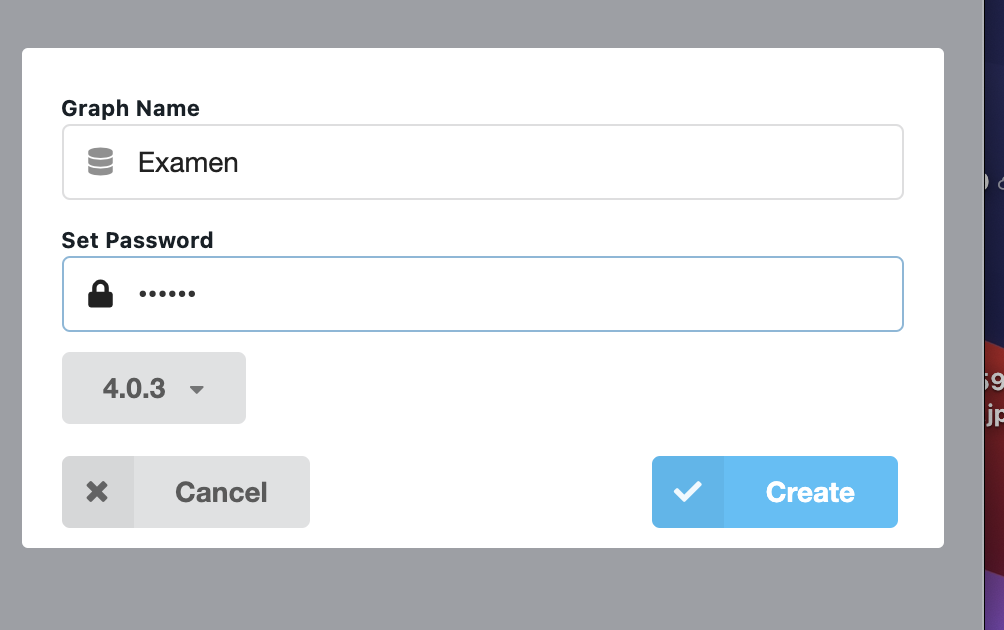



### Resultados de los datos ingresados a neo4j

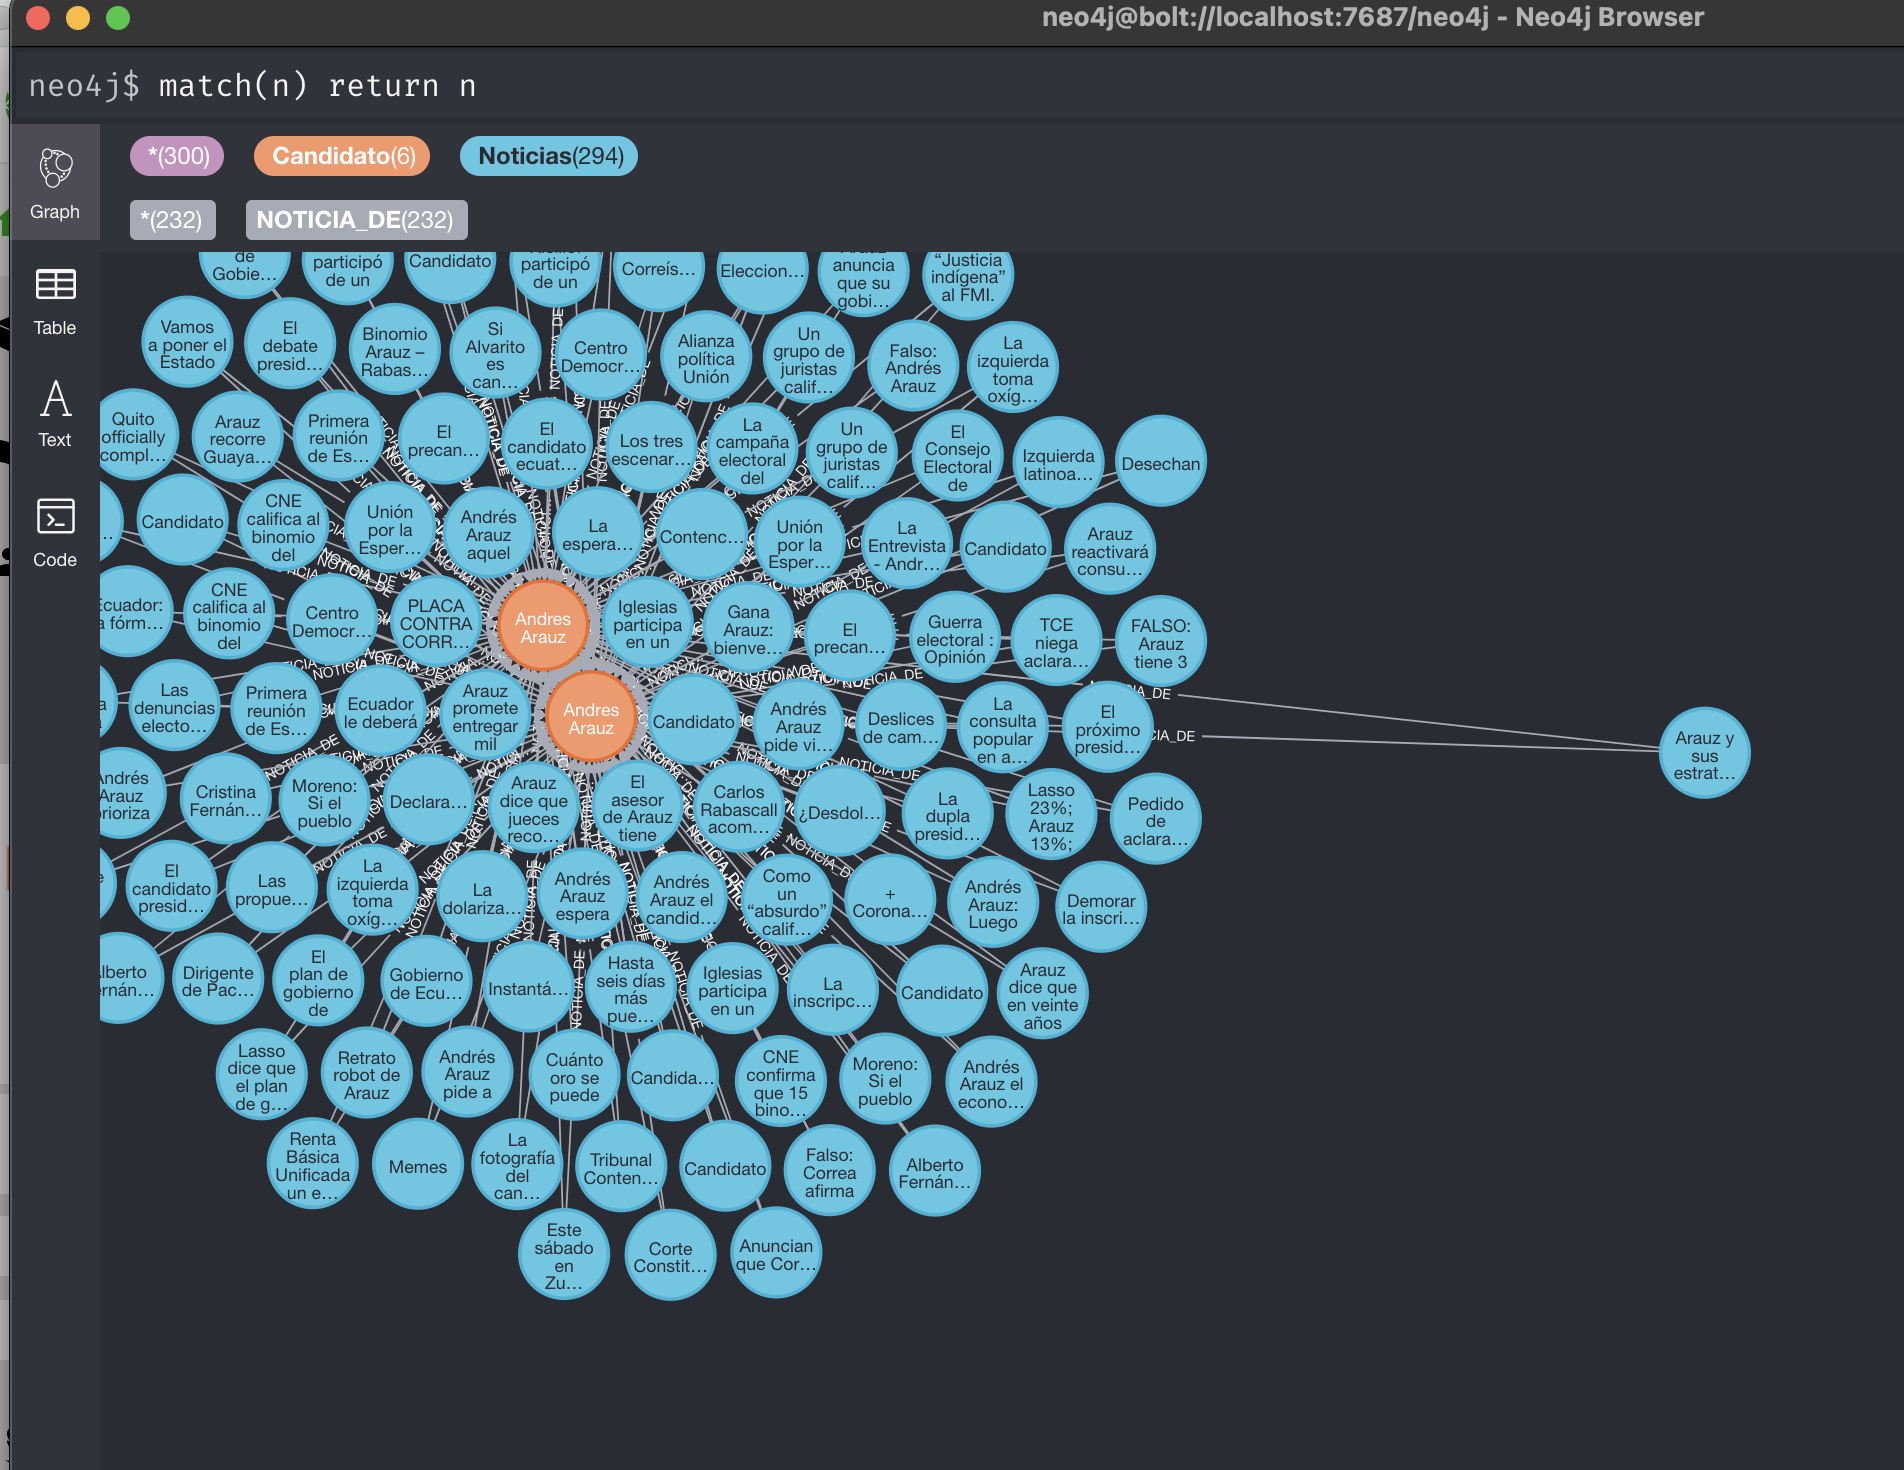


